In [48]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# ECS7020P Principles of Machine Learning - Elliot Linsey QMUL

Machine Learning is defined as:
* The ability to acquire knowledge, by extracting patterns from raw data.
* A set of tools for modeling and understanding complex datasets.

Our data is always represented by a **dataset**. 

A row within this dataset corresponds to an *item*, a column corresponds to a *feature* or *attribute*. 

,Animal,BM (g),HR (bpm)
0,Wild mouse,22,480
1,White rat,237,347
2,White mouse,29,376
3,Talapoin,100,233
4,Syrian bear,250000,70


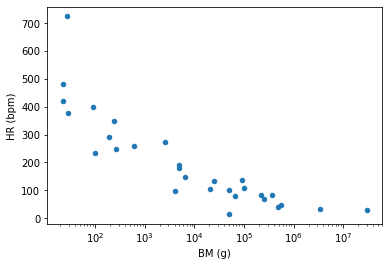

In [49]:
df = pd.read_csv('AnimalsHRvsBM.csv')
display(df.head())
df.plot.scatter(x="BM (g)", y="HR (bpm)", logx=True)
plt.show()

**Knowledge** can be represented as: 
* **Proposition** (statement, law). Smaller animals have a faster heartbeat
* **Narrative** (description, story). The size of an animal seems to be related to its heartbeat. In general, larger animals tend to have a slow heartbeat. For instance, the humpback whale... 
* **Model** (mathematical or computer). $r=235\times m^{-1/4}$, where $r$ is the heart rate and $m$ is the body mass.

We will mostly use **models** to represent knowledge. 

### ML and AI

Some AI solutions use ML algorithms, some do not. In addition, ML can be used outside the AI remit. 

Most of the time, when media and companies talk about AI, they mean ML, basic statistics or just some form of computation. 

### Deployment and Quality Assessing

Within ML, we are trying to find the best model for our data. This involves *training* our model on previous data, then assessing our model using unseen *test* data during deployment. The process of taking in data, performing transformations and normalisations, then modeling it to lead to an output or prediction is known as a *pipeline*. This pipeline is what we deploy at the end of the process. 

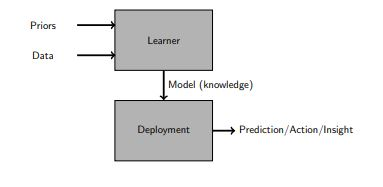

### ML Taxonomy

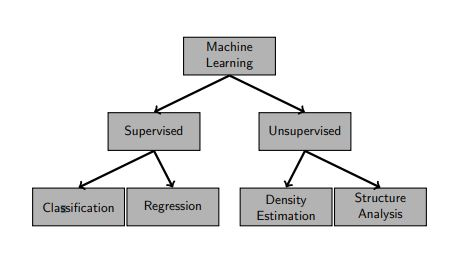

#### Supervised Learning

Within supervised learning, we already have **labelled** data that we can learn from. From this, we can predict new feature values for a new item. For example, using the animals dataset above, if presented with a new item with a body mass of 250g, we can predict a heart rate value using the existing data. This would be an example of *regression*. 

Classification: The label is a **discrete** variable. In a spam detector, an email can be labelled as 'spam' or 'not spam'. There is no in-between. 

Regression: The label is a **continuous** variable. The height of a person is a continuous variable as you can keep being more accurate, eg 180.8374... cm tall. 

#### Unsupervised Learning

Within unsupervised learning, we attempt to find the underlying structure of our data. This can be used to gain understanding, identify anomalies and clusters, compress our data and reduce processing time. 

Structure Analysis: Contains clustering and component analysis. Clustering focuses on groups of datapoints. Component analysis identifies directions of interest. 

Density estimation: provides statistical models that describe the distribution of samples in the attribute space. 

## Linear Regression

Linear regression falls under the *supervised* learning umbrella as we are using past data to predict labels for new data. These labels are *continuous*, ie numerical in value. 

$x_i$ is the predictor. 

$f(\cdot)$ is the model.

$\hat{y}_i$ is the predicted label outputted from the model.

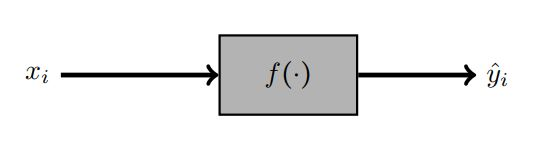

**Remember** that linear regression does not explain underlying **cause** between predictor and label. It only measures **association**. In ML we do not build causal models. A predictor and label may *appear* associated for a number of reasons: 
* One causes the other (indirectly or directly), this is not something we can determine from a linear regression, we can only determine association or correlation. 
* A third variable affects both variables (confounding variable).
* Our sampling method. 

#### Quality

To determine the quality of our regression, we use a metric called **mean squared error** or *MSE*. We can estimate an MSE ($Emse$) if provided with a model and dataset using the equation: 

$\frac{1}{N}\Sigma_{i=1}^N(y-\hat{y}_i)^2$

This just translates to the sum of every true label minus the corresponding predicted label, squared. 

#### Quick Example

Actual vs Predicted:

43 - 41 = 2

44 - 46 = -2

38 - 32 = 6

Square and sum the errors: $2^2 + -2^2 + 6^2 = 4 + 4 + 36 = 44$

Find the mean of this sum: 44/3 (or $\frac{1}{3}\times\Sigma$ )

$Emse = 14.7$

Here's the Sklearn module and the same values.


In [50]:
from sklearn.metrics import mean_squared_error
true = np.array([43,44,38])
pred = np.array([41,46,32])
mean_squared_error(true,pred)

14.666666666666666

Error will most likely always be present within our models. We can formalise this using the equation: 

$y_i = \hat{y}_i + e_i$

Using one of the previous examples we see this is fairly straightforward: 

43 = 41 + 2

Within our regression problem, we must be aware that:
* The chosen predictor(s) may not fully encapsulate all factors that determine the label. 
* The chosen model may not be able to capture the pattern between the predictor and label.
* There may be random noise present (for example, weight can fluctuate through the day depending on what you eat which could have an effect on predicting height, depending on what time of day you were weighed). 

### Optimisation

Our goal is to find the model with the lowest $Emse$ on our dataset. However, this may not be the true **Minimum mean squared error** ($Mmse$) which we can only find during **deployment**. 

#### Simple Linear Regression

The equation for a straight line is $y = mx + c$. We use the same formula but with different symbols (and rearranged) for simple linear regression, which only has one predictor. This equation being:

$\hat{y}_i = w0 + w1x_i$

Here, $\hat{y}_i$ is the prediction for sample $i$.

$w0$ is the intercept. 

$w1x_i$ is the slope for predictor $x_i$.

Both these coefficients need to be tuned to achieve the lowest $Emse$. 

Let's use a basic dataset to demonstrate the various types of linear regression. 

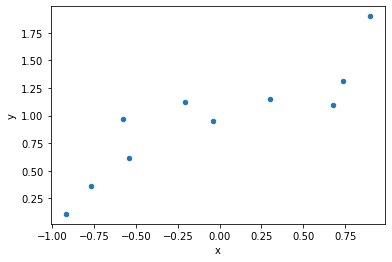

In [51]:
df2 = pd.DataFrame({
    'x': [0.3000, -0.7700, 0.9000, -0.0400, 0.7400, -0.5800, -0.9200, -0.2100, -0.5400, 0.6800],
    'y': [1.1492,  0.3582, 1.9013,  0.9487, 1.3096,  0.9646,  0.1079,  1.1262,  0.6131, 1.0951]
})
df2.plot.scatter(x='x', y='y')
plt.show()
x_train = df2['x'].to_numpy()
y_train = df2['y'].to_numpy()

#### Polyfit and Poly1d

We can use np.polyfit() to generate the least squares solution to provide the optimal $Emse$ for our x predictors and y labels. Be aware that it returns the intercept $w0$ as the last element. 

In [52]:
w = np.polyfit(x_train,y_train,1)
w

array([0.66211737, 0.98652316])

We can now use these coefficients to create a numpy polynomial object using poly1d. There are a number of attributes that this polynomial object has, such as p.c which will return the original coefficients. 

In [53]:
p = np.poly1d(w)
print("The mathematical expression of the fitted linear model is : ", p)
print("The coefficients of the model are : ", p.c)

The mathematical expression of the fitted linear model is :   
0.6621 x + 0.9865
The coefficients of the model are :  [0.66211737 0.98652316]


Using this object, we can now pass in any predictor $x$ to it and it will make a prediction. With a predictor of 0 below, it predicts y to be 0.9865 which we can confirm as it is simply the intercept value of our coefficients. We can also pass in numpy arrays, then use our MSE method from earlier.

In [54]:
print('Predicted y value when x = 0: ' + str(p(0)))
print('Predicted y values = ' + str(p(x_train)))
print('MSE = ' + str(mean_squared_error(p(x_train), y_train)))

Predicted y value when x = 0: 0.9865231644203778
Predicted y values = [1.18515838 0.47669279 1.5824288  0.96003847 1.47649002 0.60249509
 0.37737518 0.84747852 0.62897978 1.43676298]
MSE = 0.05434014916039903


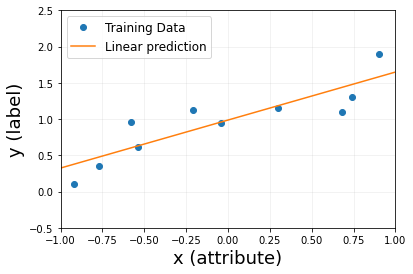

In [55]:
x_LS = np.linspace(-1,1,100).T
y_LS = p(x_LS)

plt.plot(x_train, y_train, 'o', label="Training Data")
plt.plot(x_LS, y_LS, label="Linear prediction")
plt.xlabel("x (attribute)", fontsize=18)
plt.ylabel("y (label)", fontsize=18)
plt.xlim(-1,1)
plt.ylim(-0.5,2.5)
plt.grid(alpha=0.2)
plt.legend(fontsize=12)
plt.show()

#### Polynomial Regression

This is as simple as doing the same steps with polyfit and poly1d, but specifying how many degrees of freedom you want in the polyfit method. 

With more degrees of freedom comes more flexibility, however there is a greater risk of overfitting to your training data. With less degrees of freedom, there is a greater risk of underfitting as your model is too rigid and does not capture the underlying pattern. 

Flexible models can create more complex shapes, therefore they will always make better predictions during training. However, if they capture the training pattern too thoroughly, they make overfit and have large errors when used to test data. 

In [56]:
w2 = np.polyfit(x_train, y_train, 5)
print('coefficients = ' + str(w2))

coefficients = [ 1.24458074  1.04837169  0.04529303 -0.95118004  0.12191647  1.09968234]


In [57]:
p2 = np.poly1d(w2)
print("The mathematical expression of the fitted linear model is : \n", p2)

The mathematical expression of the fitted linear model is : 
        5         4           3          2
1.245 x + 1.048 x + 0.04529 x - 0.9512 x + 0.1219 x + 1.1


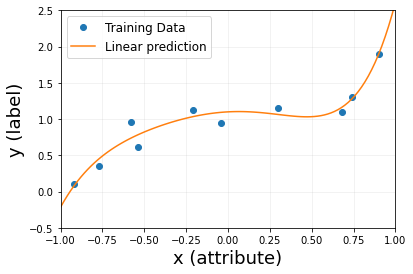

In [58]:
y_LS2 = p2(x_LS)

plt.plot(x_train, y_train, 'o', label="Training Data")
plt.plot(x_LS, y_LS2, label="Linear prediction")
plt.xlabel("x (attribute)", fontsize=18)
plt.ylabel("y (label)", fontsize=18)
plt.xlim(-1,1)
plt.ylim(-0.5,2.5)
plt.grid(alpha=0.2)
plt.legend(fontsize=12)
plt.show()

In [59]:
print('The MSE = ' + str(mean_squared_error(p2(x_train),y_train)))

The MSE = 0.01323580616850036


Using the polynomial of degree 5 produces a curved line through our points. It also decreases the MSE in comparison to our simple linear regression model. however, the only way to tell if this is overfit would be to apply it to new data and calculate the $Emse$ using those new datapoints.

#### Custom Coefficients

If we want to generate the new values using custom coefficients, we can also use poly1d. Take the below dataset:

In [60]:
df2 = pd.DataFrame({
    'x': [2,3,1,1,0,5,4,6,5,3],
    'y': [1,2,2,1,1,3,3,7,6,5]
})
x = df2['x'].to_numpy()
y = df2['y'].to_numpy()
df2

,x,y
0,2,1
1,3,2
2,1,2
3,1,1
4,0,1
5,5,3
6,4,3
7,6,7
8,5,6
9,3,5


If we want to find the predicted values using the formula: 

$f_1(x) = 2x+1$

We can use np.poly1d to generate another numpy polynomial object. We also need to create a design matrix. Due to the way poly1d generates the coefficients we need to construct the matrix with a stack of 1s at the end. 

In [61]:
x_matrix = np.column_stack([x, np.ones(x.shape)])
x_matrix

array([[2., 1.],
       [3., 1.],
       [1., 1.],
       [1., 1.],
       [0., 1.],
       [5., 1.],
       [4., 1.],
       [6., 1.],
       [5., 1.],
       [3., 1.]])

In [62]:
p3 = np.poly1d([2,1])
print(p3)

 
2 x + 1


Multiplying them together calculates the y predicted labels.

In [63]:
x_matrix@p3

array([ 5.,  7.,  3.,  3.,  1., 11.,  9., 13., 11.,  7.])

### Multiple Linear Regression

We cannot use polyfit for multiple linear regression, due to this we must use the formal least squares formula:

$w = (X^TX)^{-1}X^Ty$

Due to the way this formula is works, we must create the X design matrix by stacking the ones at the beginning, rather than at the end.

In [64]:
df3 = pd.DataFrame({
    'age': [18,37,66,25],
    'height': [175,180,158,168],
    'salary': [12000, 68000,80000,45000]
})
df3

,age,height,salary
0,18,175,12000
1,37,180,68000
2,66,158,80000
3,25,168,45000


In [65]:
X_m2 = np.column_stack([np.ones(df3['age'].shape),df3['age'].to_numpy(),df3['height'].to_numpy()])
y3 = df3.salary.to_numpy()
X_m2

array([[  1.,  18., 175.],
       [  1.,  37., 180.],
       [  1.,  66., 158.],
       [  1.,  25., 168.]])

In [66]:
w3 = np.dot(np.dot(np.linalg.inv(np.dot(X_m2.T, X_m2)), X_m2.T), y3)
w3

array([-189295.8637292 ,    1565.318599  ,    1077.30828115])

This translates to:

$w_0 + w_1x_1 + w_2x_2$ or:

$-189295.9 + 1565.3\times x_1 + 1077.3\times x_2$

We can now feed in new x values to make predictions, remember that it must be in the form of an X design matrix with a column of ones at the beginning. Also, the equation must be in the format $X\times w$, as the predictions will be wrong if done the other way round due to matrix multiplication.

In [67]:
np.array([[1,20,180],
         [1,45,159],
         [1,36,167]])@w3

array([35925.99885762, 52435.48992861, 46966.08878676])

In [68]:
y_pred3 = X_m2@w3
y_pred3

array([27408.82025387, 62536.4150407 , 84229.87222655, 30824.89247886])

### More quality metrics

Root Mean Squared Error: Measures the sample standard deviation of the prediction error. This essentially shows how close the predictions were to the actual values, a value of 0 would indicate a perfect fit. You cannot compare RMSE values across different data types due to the different scales used. It is also sensitive to outliers as large errors have a disproportional effort on the RMSE (due to the squaring of the errors). 

$E_{RMSE} = \sqrt{\frac{1}{N}\Sigma e^2_i}$

Mean Absolute Error: Measures the average of the absolute prediction error. The use of MSE and MAE is due to the loss function required. If being off by 10 is **more than** twice as bad as being off by 5, then MSE is better. If being off by 10 is **only** twice as bad as being off by 5, then MAE is better. 

$E_{MAE}=\frac{1}{N}\Sigma|e_i|$

R-Squared: Measures the proportion of the variance in the response that is predictable from the predictors. Essentially, this tells us how much of the variance in the label is measurable from our chosen predictors. The range is from 0 to 1, if $R^2 = 0.50$ then approximately half of the observed variation can be explained by the model's inputs. 

$R^2 = 1-\frac{\Sigma e^2_i}{\Sigma(y_i - \bar{y})^2}$ where $\bar{y}$ = the mean of y.

Below I have imported the modules necessary to automatically calculate these quality metrics. The RMSE and MAE are not affected by which order you input them to the function, however the R2 score should be inputted with y_true, y_pred, else the answer changes. It would be advisable to get into the habit of using all functions and inputs in this order, to avoid any miscalculations. 

In [69]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
print('RMSE = ' + str(mean_squared_error(df3.salary,y_pred3,squared=False)))
print('MAE = ' + str(mean_absolute_error(df3.salary,y_pred3)))
print('R2 = ' + str(r2_score(df3.salary,y_pred3)))

RMSE = 11023.928457138645
MAE = 9819.346240216222
R2 = 0.8190721151903062


### Underfitting and Overfitting

Underfitting: When your model does not capture the underlying pattern enough and is too general.

Overfitting: When your model memorises insignificant patterns, it will fit very well to training data but badly to test or unseen data. 

Underfitting:

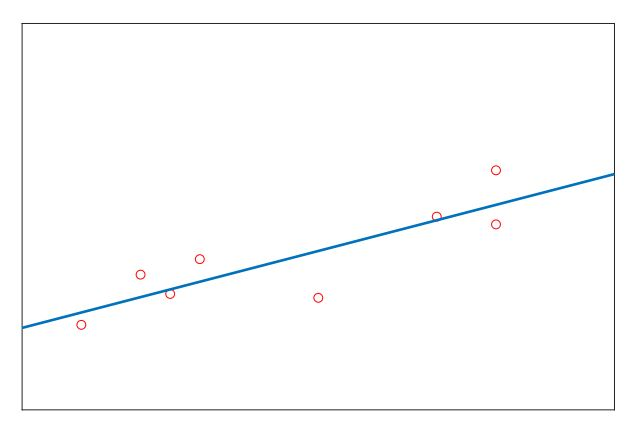

Overfitting:

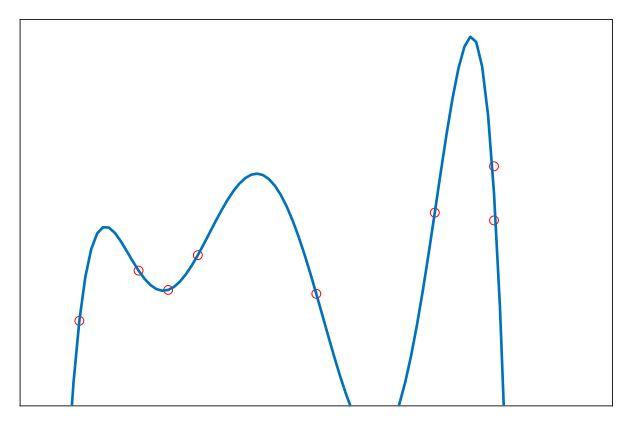

Just right

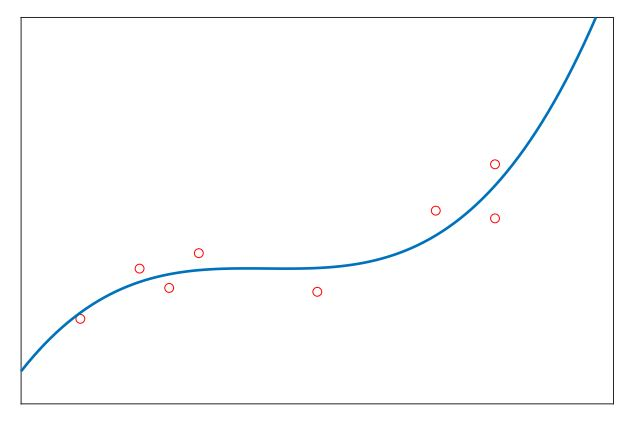

Generalisation can only be assessed by looking at how the model performs with both training and test data. 

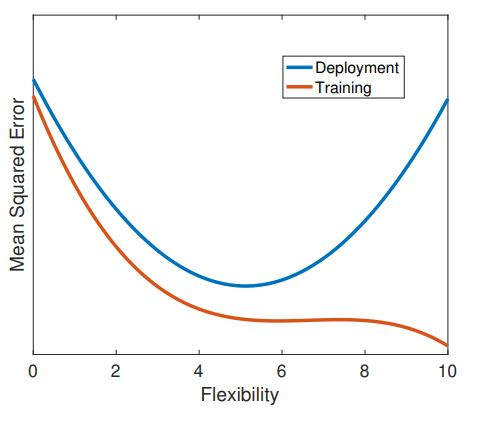

### Regularisation

A method to assess whether our model is overfitting to the training data is to use the Sum of the Squared Coefficients (**SSC**). This is simply the sum of all the *w* coefficients, the higher the sum the more likely it is that you have overfit. This is especially prevalent with polynomial regressions as there are more coefficients, therefore more scope for a higher SSC value. 

Using the *least squares* method to obtain the lowest MSE value allows the *w* coefficients to take on any value and therefore be more flexible the more polynomial degrees you have. *Regularisation* introduces a term *lambda* $\lambda$ to constrain the range of these coefficients and therefore decrease the SSC. 

A low lambda will pay more attention to reducing the MSE and a high lambda will pay more attention to reducing the SSC. 

The formula is a simple alteration to the original least squares formula:

$w = (X^TX+N\lambda I)^{-1}X^Ty$

Where *N* is the number of samples, *lambda* is the regularisation value and *I* is an identity matrix (with the same parameter as N). 

Using a dataset containing training values and test values, let's investigate how regularisation can affect the SSC and MSE.

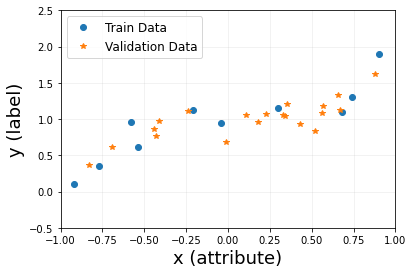

In [70]:
xTrain = np.array([0.3000, -0.7700, 0.9000, -0.0400, 0.7400, -0.5800, -0.9200, -0.2100, -0.5400, 0.6800])
yTrain = np.array([1.1492,  0.3582, 1.9013,  0.9487, 1.3096,  0.9646,  0.1079,  1.1262,  0.6131, 1.0951])
xVal = np.array([0.1100, 0.2300, 0.1800, 0.3500, 0.5200, -0.4400, -0.6900, -0.2400, 0.4300, -0.4100, 0.3300, 0.8800, -0.4300, 0.5600, 0.6600, -0.0100, -0.8300, 0.5700, 0.3400, 0.6700])
yVal = np.array([1.0569, 1.0647, 0.9575, 1.2097, 0.8371, 0.8573, 0.6128, 1.1087, 0.9253, 0.9788, 1.0590, 1.6263, 0.7660, 1.0799, 1.3341, 0.6867, 0.3657, 1.1747, 1.0440, 1.1315])
plt.plot(xTrain, yTrain, 'o', label="Train Data")
plt.plot(xVal, yVal, '*', label="Validation Data")
plt.xlabel("x (attribute)", fontsize=18)
plt.ylabel("y (label)", fontsize=18)
plt.xlim(-1,1)
plt.ylim(-0.5,2.5)
plt.grid(alpha=0.2)
plt.legend(fontsize=12)
plt.show()

Here we apply a linear model with degree 9 to demonstrate severe overfitting, we can see that there is almost 0 training error, 0.5 test error (high in comparison to the training) and a ridiculously high SSC. Applying a lambda regularisation method to this will reduce the SSC, reduce the test error but also increase the training error so that all values are hopefully low and in balance. 

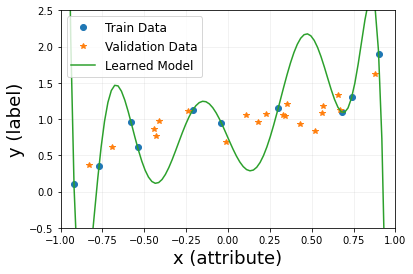

Training error: 2.0627305356000495e-26
Test error: 0.5349011400613618
SSC: 1055644.0746738801


In [73]:
w4 = np.polyfit(xTrain,yTrain,9)
p4 = np.poly1d(w4)
x_LS = np.linspace(-1,1,100).T
plt.plot(xTrain, yTrain, 'o', label="Train Data")
plt.plot(xVal, yVal, '*', label="Validation Data")
plt.plot(x_LS,p4(x_LS), label='Learned Model')
plt.xlabel("x (attribute)", fontsize=18)
plt.ylabel("y (label)", fontsize=18)
plt.xlim(-1,1)
plt.ylim(-0.5,2.5)
plt.grid(alpha=0.2)
plt.legend(fontsize=12)
plt.show()

print('Training error: '+ str(mean_squared_error(yTrain,p4(xTrain))))
print('Test error: ' + str(mean_squared_error(yVal,p4(xVal))))
print('SSC: ' + str(sum(w4**2)))

To apply this regularisation method, we cannot use polyfit as that automatically generates the least squared solution for our coefficients and we want to limit our coefficients. Due to this, we have to use the formal method: 

$w = (X^TX+N\lambda I)^{-1}X^Ty$

Remember that in doing this, we have to create a design matrix with a stack of ones at the beginning and the polynomial degrees of our x values. 

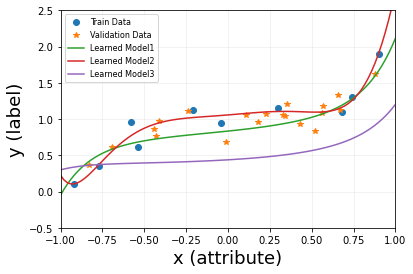

Training error 1: 0.03777855655504806
Test error 1: 0.023291384698632144
SSC 1: 0.950761391945969

Training error 2: 0.011450285731472384
Test error 2: 0.020060283476128767
SSC 2: 16.794796005640013

Training error 3: 0.30401978399695795
Test error 3: 0.26370985444826844
SSC 3: 0.2681227787477386


In [89]:
XTrain = np.column_stack([np.ones(xTrain.shape), xTrain, xTrain**2, xTrain**3, xTrain**4, 
                          xTrain**5, xTrain**6, xTrain**7, xTrain**8, xTrain**9])
XVal = np.column_stack([np.ones(xVal.shape), xVal, xVal**2, xVal**3, xVal**4, 
                        xVal**5, xVal**6, xVal**7, xVal**8, xVal**9])
X_LS = np.column_stack([np.ones(x_LS.shape), x_LS, x_LS**2, x_LS**3, x_LS**4, 
                        x_LS**5, x_LS**6, x_LS**7, x_LS**8, x_LS**9])
myLambda1 = 0.1
myLambda2 = 0.00001
myLambda3 = 1
w5 = np.dot(np.dot(np.linalg.inv(np.dot(XTrain.T, XTrain) + 10*myLambda1*np.identity(10)), XTrain.T), yTrain)
w5_2 = np.dot(np.dot(np.linalg.inv(np.dot(XTrain.T, XTrain) + 10*myLambda2*np.identity(10)), XTrain.T), yTrain)
w5_3 = np.dot(np.dot(np.linalg.inv(np.dot(XTrain.T, XTrain) + 10*myLambda3*np.identity(10)), XTrain.T), yTrain)
plt.plot(xTrain, yTrain, 'o', label="Train Data")
plt.plot(xVal, yVal, '*', label="Validation Data")
plt.plot(x_LS,X_LS@w5, label='Learned Model1')
plt.plot(x_LS,X_LS@w5_2, label='Learned Model2')
plt.plot(x_LS,X_LS@w5_3, label='Learned Model3')
plt.xlabel("x (attribute)", fontsize=18)
plt.ylabel("y (label)", fontsize=18)
plt.xlim(-1,1)
plt.ylim(-0.5,2.5)
plt.grid(alpha=0.2)
plt.legend(fontsize=8)
plt.show()

print('Training error 1: '+ str(mean_squared_error(yTrain,XTrain@w5)))
print('Test error 1: ' + str(mean_squared_error(yVal,XVal@w5)))
print('SSC 1: ' + str(sum(w5**2)))
print('\nTraining error 2: '+ str(mean_squared_error(yTrain,XTrain@w5_2)))
print('Test error 2: ' + str(mean_squared_error(yVal,XVal@w5_2)))
print('SSC 2: ' + str(sum(w5_2**2)))
print('\nTraining error 3: '+ str(mean_squared_error(yTrain,XTrain@w5_3)))
print('Test error 3: ' + str(mean_squared_error(yVal,XVal@w5_3)))
print('SSC 3: ' + str(sum(w5_3**2)))

As we can see changing the lambda factor changes the shape of the line we produce, as well as the error values and SSC. To select the best model we would have to go through each lambda factor and compare the scores we receive. We would also have to select the appropriate trade-off between SSC and our errors. Below is an example of lambda values we could use: 

We can also see from above that as the lambda value increases, the SSC decreases and the errors increase. As lambda gets closer to 10, the line gets closer to becoming a constant model with no flexibility.  

In [91]:
myLambdasList =[0, 10**-10, 10**-9, 10**-8, 10**-7, 10**-6, 10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1, 10]

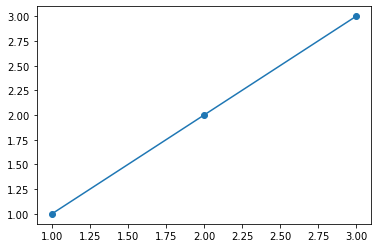

2

In [127]:
plt.scatter(x=[1,2,3],y=[1,2,3])
plt.plot([1,2,3],[1,2,3])
plt.show()
w6=np.array([0,1]).T
X_maybe=np.array([1,2]).T
w6@X_maybe

In [130]:
df4 = pd.DataFrame({
    'x': [1,2,3,7,8,9],
    'y': [7,8,9,1,2,3],
    'color': ['r','r','r','b','b','b']
})
display(df4)
x_bin = df4['x'].to_numpy()
y_bin = df4['y'].to_numpy()

,x,y,color
0,1,7,r
1,2,8,r
2,3,9,r
3,7,1,b
4,8,2,b
5,9,3,b


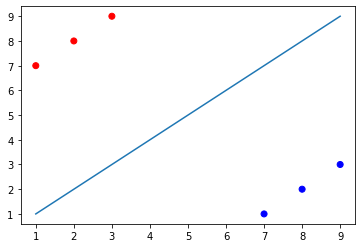

In [138]:
plt.scatter(x_bin,y_bin,c=df4.color)
w6 = np.polyfit(x_bin,y_bin,1)
p6 = np.poly1d(w6)
X_bin_LS = np.linspace(1,9,100)
plt.plot(X_bin_LS,X_bin_LS)
plt.show()